### Code réalisé par Robin Mathelier en marge du livre "Hands-on Machine Learning with Scikit-Learn and Tensorflow" (O'Reilly, 2017) d'Aurélien Géron

In [1]:
import os
os.chdir('C:/Users/robin/Dropbox/Datasets')
os.getcwd()

import tarfile

from six.moves import urllib

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib

import numpy as np

import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier



In [2]:
mnist_train = pd.read_csv(r'C:\Users\robin\Dropbox\Datasets\mnist-in-csv\mnist_train.csv')
mnist_test = pd.read_csv(r'C:\Users\robin\Dropbox\Datasets\mnist-in-csv\mnist_test.csv')

In [3]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = mnist_train.drop('label',axis = 1)
y_train = mnist_train['label']
X_test = mnist_test.drop('label',axis = 1)
y_test = mnist_test['label']

In [5]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [6]:
X_train[0].shape

(784,)

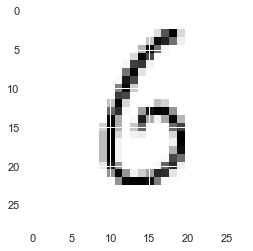

In [7]:
some_digit = X_train[18]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')

In [8]:
y_train[36000]

9

In [9]:
shuffle_index = np.random.permutation(60000)
shuffle_index
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
y_train_5

array([False, False, False, ..., False, False, False])

y_train_5[6]

In [11]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict(X_train[35462].reshape(1,-1))

array([False])

In [13]:
y = sgd_clf.predict(X_train)
np.where(y == True)

(array([    5,    11,    23, ..., 59972, 59981, 59994], dtype=int64),)

In [14]:
y

array([False, False, False, ..., False, False, False])

In [15]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.96795, 0.9681 , 0.9643 ])

In [16]:
y_train_pred = cross_val_predict(sgd_clf,X_train, y_train_5, cv = 3)

In [17]:
y_train_pred.shape

(60000,)

In [18]:
confusion_matrix(y_train_5, y_train_pred)

array([[53708,   871],
       [ 1122,  4299]], dtype=int64)

In [19]:
precision_score(y_train_5, y_train_pred)

0.8315280464216634

In [20]:
recall_score(y_train_5, y_train_pred)

0.793027116768124

In [21]:
f1_score(y_train_5, y_train_pred)

0.8118213577565857

In [22]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([551.92521317])

In [23]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method= 'decision_function')

In [24]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [25]:
recalls.shape, precisions.shape, thresholds.shape

((59971,), (59971,), (59970,))

In [26]:
thresholds

array([-112039.86438208, -111532.63256339, -109954.37817921, ...,
         30507.9692108 ,   33436.77261783,   36541.23476863])

In [27]:
def plot_precision_recall(precisions, recalls, thresholds) :
    plt.plot(thresholds, precisions[:-1], label = "Precision")
    plt.plot(thresholds, recalls[:-1], label = "Rappel")
    plt.xlabel('seuil')
    plt.legend(loc = 'center left')

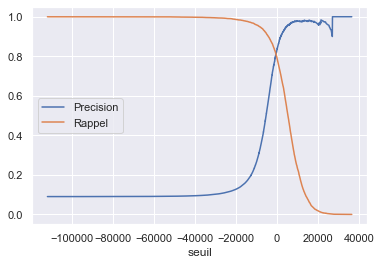

In [28]:
plot_precision_recall(precisions, recalls, thresholds)

In [29]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
tpr

array([0.00000000e+00, 1.84467810e-04, 1.66021029e-03, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

In [30]:
def plot_roc_curve(fpr, tpr, label = None) :
    plt.plot(fpr, tpr)
    plt.plot()

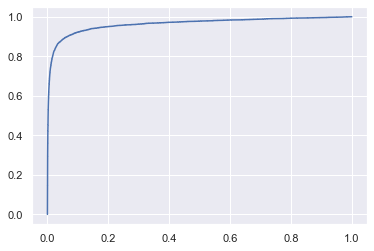

In [31]:
plot_roc_curve(fpr, tpr)

In [32]:
roc_auc_score(y_train_5, y_scores)

0.9634008009503842

In [33]:
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = 'predict_proba')

C:\Users\robin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\robin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\robin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
y_probas_forest

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [35]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

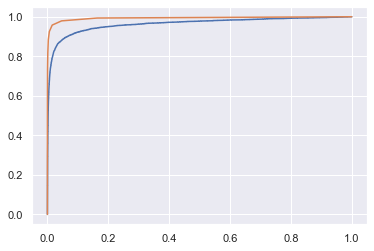

In [36]:
plt.plot(fpr, tpr)
plt.plot(fpr_forest, tpr_forest)

In [37]:
roc_auc_score(y_train_5, y_scores_forest)

0.9932389737170768

In [38]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
sgd_clf.predict([some_digit])

array([6], dtype=int64)

In [40]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-15396.2441903 , -31451.24543124,  -6255.50582244,
         -5345.19002179, -11349.91668445,  -4234.79731462,
          2567.37048281, -21528.38715333,  -4206.80519473,
         -9652.342892  ]])

In [41]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [42]:
forest_clf.fit(X_train, y_train)

C:\Users\robin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [43]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0.1, 0. , 0. , 0. , 0.9, 0. , 0. , 0. ]])

In [44]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.87867427, 0.86229311, 0.88208231])